In [ ]:


plt.plot(df.index, df["Episodic Reward"])
plt.plot(monitor.index, monitor["Episodic Reward"])
plt.show()

In [1]:
import pandas as pd

def get_performance(files, path_prefix = "../data/QuadX-Waypoints-v1/", verbose=False):
    logs = pd.read_csv(path_prefix + files[0], sep=' ', header=None, names=["Steps", "Rewards"])
    logs["Episodic Reward"] = logs["Rewards"].rolling(100).mean()
    logs.loc[:100, "Episodic Reward"] = logs.loc[:100, "Rewards"]
    logs = logs[["Episodic Reward"]]
    min = len(logs)
    i =0
    for file in files[1:]:
        df = pd.read_csv(path_prefix + file, sep=' ', header=None, names=["Steps", "Rewards"])
        df["Episodic Reward"] = df["Rewards"].rolling(100).mean()
        df.loc[:100, "Episodic Reward"] = df.loc[:100, "Rewards"]
        # if len(df)< min:
        #     print(file)
        #     print(len(df))
        #     print("------")
        logs = pd.merge(logs, df["Episodic Reward"],suffixes=(None, f"_{i}"), left_index=True, right_index=True)
        i += 1

    std_ppoc = logs.std(axis=1)
    mean_ppoc = logs.mean(axis=1)
    ci_lower_ppoc = mean_ppoc-1.96*(std_ppoc/(len(files)))
    ci_upper_ppoc = mean_ppoc+1.96*(std_ppoc/(len(files)))
    if verbose:
        return mean_ppoc, ci_lower_ppoc, ci_upper_ppoc, logs
    return mean_ppoc, ci_lower_ppoc, ci_upper_ppoc

In [2]:
import pandas as pd
from stable_baselines3.common.monitor import load_results

def get_performance_ppo(files, path="../models/"):
    monitor = load_results(f"{path}{files[0]}/data/")
    monitor["Episodic Reward"] = monitor["r"].rolling(100).mean()
    monitor.loc[:100, "Episodic Reward"] = monitor.loc[:100, "r"]
    monitor = monitor[["Episodic Reward"]]
    min = len(monitor)
    for i in range(1, len(files)):
        df = load_results(f"{path}{files[i]}/data/")
        df["Episodic Reward"] = df["r"].rolling(100).mean()
        df.loc[:100, "Episodic Reward"] = df.loc[:100, "r"]
        monitor = pd.merge(monitor, df["Episodic Reward"],suffixes=(None, f"_{i}"), left_index=True, right_index=True)
    std_ppo = monitor.std(axis=1)
    mean_ppo = monitor.mean(axis=1)
    ci_lower_ppo = mean_ppo-1.96*(std_ppo/(len(files)+1))
    ci_upper_ppo = mean_ppo+1.96*(std_ppo/(len(files)+1))
    return mean_ppo, ci_lower_ppo, ci_upper_ppo


## Obstacle Environment

In [3]:
files = [
    # add paths to ppoc 4 options
]
mean_ppoc4, ci_lower_ppoc4, ci_upper_ppoc4 = get_performance(files, "../data/QuadX-Obstacles-v1/")

files = [
    # add paths to ppoc 3 options
]
mean_ppoc3, ci_lower_ppoc3, ci_upper_ppoc3 = get_performance(files, "../data/QuadX-Obstacles-v1/")

files = [
  # add paths to ppoc 2 options
]
mean_ppoc2, ci_lower_ppoc2, ci_upper_ppoc2 = get_performance(files, "../data/QuadX-Obstacles-v1/")

files = [
    # add your files for ppoc 1 option
]
mean_ppoc1, ci_lower_ppoc1, ci_upper_ppoc1 = get_performance(files, "../data/QuadX-Obstacles-v1/")

files = [
    # add your own paths to ppo
]
mean_ppo, ci_lower_ppo, ci_upper_ppo = get_performance_ppo(files)

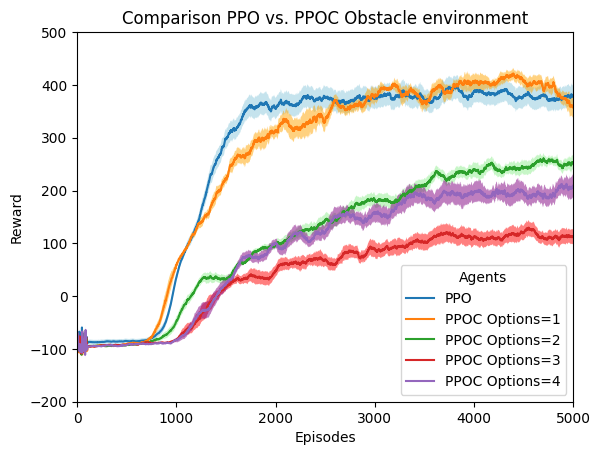

In [14]:
import matplotlib.pyplot as plt
plt.plot(mean_ppo.index, mean_ppo, label="PPO")
plt.fill_between(mean_ppo.index, ci_lower_ppo, ci_upper_ppo, alpha=0.7, facecolor="Lightblue")
plt.plot(mean_ppoc1.index, mean_ppoc1, label="PPOC Options=1")
plt.fill_between(mean_ppoc1.index, ci_lower_ppoc1, ci_upper_ppoc1, alpha=0.5, facecolor="Orange")
plt.plot(mean_ppoc2.index, mean_ppoc2, label="PPOC Options=2")
plt.fill_between(mean_ppoc2.index, ci_lower_ppoc2, ci_upper_ppoc2, alpha=0.5, facecolor="Lightgreen")
plt.plot(mean_ppoc3.index, mean_ppoc3, label="PPOC Options=3")
plt.fill_between(mean_ppoc3.index, ci_lower_ppoc3, ci_upper_ppoc3, alpha=0.5, facecolor="red")
plt.fill_between(mean_ppoc4.index, ci_lower_ppoc4, ci_upper_ppoc4, alpha=0.5, facecolor="purple")
plt.plot(mean_ppoc4.index, mean_ppoc4, label="PPOC Options=4")


plt.legend(title="Agents")
plt.xlim(0,5000)
plt.ylim(-200,500)
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title("Comparison PPO vs. PPOC Obstacle environment")
plt.show()

## Hover

In [8]:
files = [
    # file paths
]
mean_ppoc4, ci_lower_ppoc4, ci_upper_ppoc4 = get_performance(files, "../data/QuadX-Hover-v1/")

files = [
    # file paths
]
mean_ppoc2, ci_lower_ppoc2, ci_upper_ppoc2 = get_performance(files, "../data/QuadX-Hover-v1/")

files = [
    # file paths
]
mean_ppoc1, ci_lower_ppoc1, ci_upper_ppoc1 = get_performance(files, "../data/QuadX-Hover-v1/")

files = [
    # file paths
]
mean_ppo, ci_lower_ppo, ci_upper_ppo = get_performance_ppo(files)

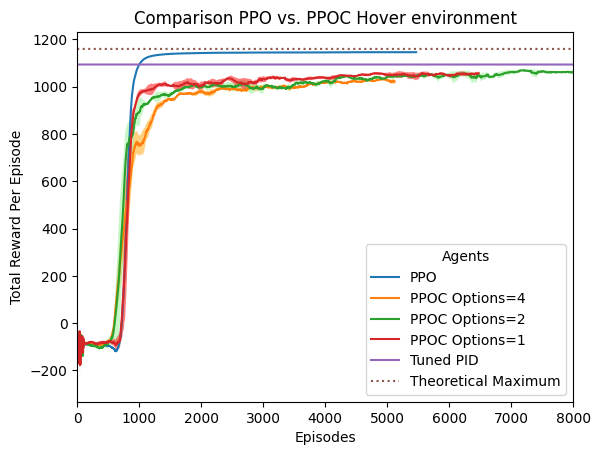

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(mean_ppo.index, mean_ppo, label="PPO")
plt.fill_between(mean_ppo.index, ci_lower_ppo, ci_upper_ppo, alpha=0.7, facecolor="Lightblue")
plt.plot(mean_ppoc4.index, mean_ppoc4, label="PPOC Options=4")
plt.fill_between(mean_ppoc4.index, ci_lower_ppoc4, ci_upper_ppoc4, alpha=0.5, facecolor="Orange")
plt.plot(mean_ppoc2.index, mean_ppoc2, label="PPOC Options=2")
plt.fill_between(mean_ppoc2.index, ci_lower_ppoc2, ci_upper_ppoc2, alpha=0.5, facecolor="Lightgreen")
plt.plot(mean_ppoc1.index, mean_ppoc1, label="PPOC Options=1")
plt.fill_between(mean_ppoc1.index, ci_lower_ppoc1, ci_upper_ppoc1, alpha=0.5, facecolor="Red")
plt.plot(mean_ppoc2.index, np.full(
  shape=len(mean_ppoc2.index,),
  fill_value=1094.32,
  dtype=np.int32
), label="Tuned PID")
plt.plot(mean_ppoc2.index, np.full(
  shape=len(mean_ppoc2.index,),
  fill_value=1160.0,
  dtype=np.int32
), label="Theoretical Maximum", linestyle='dotted')
plt.legend(title="Agents")
plt.legend(title="Agents")
plt.xlabel('Episodes')
plt.ylabel('Total Reward Per Episode')
plt.xlim(0,8000)
plt.title("Comparison PPO vs. PPOC Hover environment")
plt.show()

## Waypoints

In [19]:
import pandas as pd
from stable_baselines3.common.monitor import load_results

files = [
    "PPO2__QuadX-Waypoints-v1_tnAJlRQRxAwxfCSvNOhm",
    "PPO2__QuadX-Waypoints-v1_OxjhwJDKXSxOXoVtpuTQ",
    "PPO2__QuadX-Waypoints-v1_LwSqMhauYcaskRsXxOuB",
    "PPO2__QuadX-Waypoints-v1_gOTvZaskQroeFqqKWHVU",
    "PPO2__QuadX-Waypoints-v1_eXfkgzSaXUNwpHOetywi",
    "PPO2__QuadX-Waypoints-v1_EvWTXTuyllYQNFKjmSJB",
    "PPO2__QuadX-Waypoints-v1_DHkcdsnrDqNKwpVoMtdu",
    "PPO2__QuadX-Waypoints-v1_DhwZyAIMJcZckbvMUCxb",
    "PPO2__QuadX-Waypoints-v1_IgalgHOoYnHsiKceeHmy",
    "PPO2__QuadX-Waypoints-v1_IpByMSdjzTacMpoFboBh",
    "PPO2__QuadX-Waypoints-v1_ljFRtTzZRGWEfJPpmTWB",
    "PPO2__QuadX-Waypoints-v1_LwSqMhauYcaskRsXxOuB",
    "PPO2__QuadX-Waypoints-v1_QBNCVNgEUrSmlRtUfclO",
    "PPO2__QuadX-Waypoints-v1_RyzOBTASpLKhzzMJiKOP",
    "PPO2__QuadX-Waypoints-v1_UjBnJsGOnuRueMGMephy",
    "PPO2__QuadX-Waypoints-v1_wbYsmVrQiDIrnbIKIJme",
    "PPO2__QuadX-Waypoints-v1_wDPvCfLejziTeTtEthkz",
    "PPO2__QuadX-Waypoints-v1_xOnODeRxzLqKMyLIwlmi"
]
mean_ppo, ci_lower_ppo, ci_upper_ppo = get_performance_ppo(files)

In [43]:
files_1option = [
        # file paths

    ]
mean_ppoc1, ci_lower_ppoc1, ci_upper_ppoc1 = get_performance(files_1option)

files_2options = [
        # file paths
        
    ]
mean_ppoc2, ci_lower_ppoc2, ci_upper_ppoc2 = get_performance(files_2options)

files_3options = [
       # file paths
    ]
mean_ppoc3, ci_lower_ppoc3, ci_upper_ppoc3 = get_performance(files_3options)

files_4options = [
        # file paths
    ]
mean_ppoc4, ci_lower_ppoc4, ci_upper_ppoc4 = get_performance(files_4options)

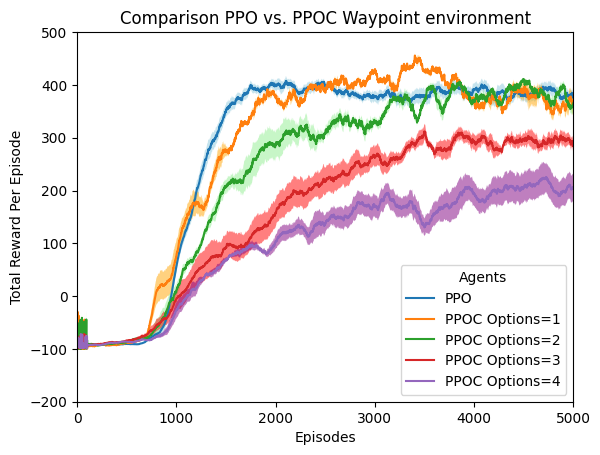

In [44]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(mean_ppo.index, mean_ppo, label="PPO")
plt.fill_between(ci_lower_ppo.index, ci_lower_ppo, ci_upper_ppo, alpha=0.7, facecolor="Lightblue")
plt.plot(mean_ppoc1.index, mean_ppoc1, label="PPOC Options=1")
plt.fill_between(mean_ppoc1.index, ci_lower_ppoc1, ci_upper_ppoc1, alpha=0.5, facecolor="Orange")
plt.plot(mean_ppoc2.index, mean_ppoc2, label="PPOC Options=2")
plt.fill_between(mean_ppoc2.index, ci_lower_ppoc2, ci_upper_ppoc2, alpha=0.5, facecolor="Lightgreen")
plt.plot(mean_ppoc3.index, mean_ppoc3, label="PPOC Options=3")
plt.fill_between(mean_ppoc3.index, ci_lower_ppoc3, ci_upper_ppoc3, alpha=0.5, facecolor="Red")
plt.plot(mean_ppoc4.index, mean_ppoc4, label="PPOC Options=4")
plt.fill_between(mean_ppoc4.index, ci_lower_ppoc4, ci_upper_ppoc4, alpha=0.5, facecolor="Purple")
plt.legend(title="Agents")
plt.xlabel('Episodes')
plt.ylabel('Total Reward Per Episode')
plt.xlim(0,5000)
plt.ylim(-200,500)
plt.title("Comparison PPO vs. PPOC Waypoint environment")
plt.show()

## Plot obstacle env

In [13]:
from obstacle_env import QuadXObstacleEnv

env = QuadXObstacleEnv(render_mode=None, num_targets=10)
env.reset()
waypoints = env.waypoints.targets
obstacles = env.waypoints.obstacles
env.close()

pybullet build time: Nov 28 2023 23:45:17


argv[0]=
                             


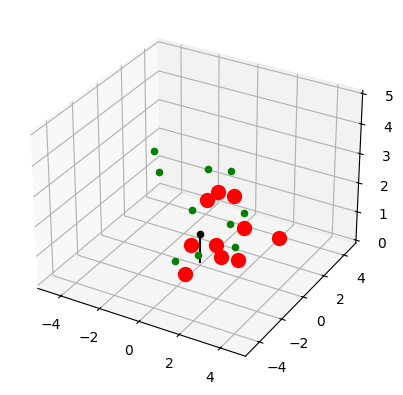

In [14]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')
ax.plot(np.full(100, 0), np.full(100, 0), zs=np.linspace(0, 1, 100), label='curve in (x,y)', c="black")

for obstacle in obstacles:
    ax.scatter(obstacle[0], obstacle[1], obstacle[2], c="red", s=100)

for waypoint in waypoints:
    ax.scatter(waypoint[0], waypoint[1], waypoint[2], c="green", s=20)

ax.scatter(0, 0, 1, c="black", s=20)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(0, 5)
plt.show()

## Hover Transferlearning

In [133]:
import pandas as pd
files = [
    # file paths
]

logs = pd.read_csv('../data/QuadX-Hover-Extended-v1/ppoc_train_20240513181213_8269.log', sep=' ', header=None, names=["Steps", "Rewards"])
logs["Episodic Reward"] = logs["Rewards"].rolling(100).mean()
logs.loc[:100, "Episodic Reward"] = logs.loc[:100, "Rewards"]
logs = logs[["Episodic Reward"]]
min = len(logs)
for i in range(len(files)):
    df = pd.read_csv(f'../data/QuadX-Hover-Extended-v1/{files[i]}', sep=' ', header=None, names=["Steps", "Rewards"])
    df["Episodic Reward"] = df["Rewards"].rolling(100).mean()
    df.loc[:100, "Episodic Reward"] = df.loc[:100, "Rewards"]
    if len(df)< min:
        print(files[i])
        print(len(df))
        print("------")
    logs = pd.merge(logs, df["Episodic Reward"],suffixes=(None, f"_{i}"), left_index=True, right_index=True)

std_ppoc = logs.std(axis=1)
mean_ppoc = logs.mean(axis=1)
ci_lower_ppoc = mean_ppoc-1.96*(std_ppoc/(len(files)+1))
ci_upper_ppoc = mean_ppoc+1.96*(std_ppoc/(len(files)+1))

ppoc_train_20240513115313_1346.log
6939
------
ppoc_train_20240513115331_7643.log
7102
------
ppoc_train_20240513115252_0103.log
6840
------


In [134]:
import pandas as pd
from stable_baselines3.common.monitor import load_results

files = [
    # file paths
]
monitor = load_results("../models/PPO__QuadX-Hover-Extended-v1_aULZTiiwDxCBxQenceWo/data")
monitor["Episodic Reward"] = monitor["r"].rolling(100).mean()
monitor.loc[:100, "Episodic Reward"] = monitor.loc[:100, "r"]
monitor = monitor[["Episodic Reward"]]
min = len(monitor)
print(min)
for i in range(len(files)):
    df = load_results(f"../models/{files[i]}/data/")
    if len(df)< min:
        print(files[i])
        print(len(df))
        print("------")
    df["Episodic Reward"] = df["r"].rolling(100).mean()
    df.loc[:100, "Episodic Reward"] = df.loc[:100, "r"]
    monitor = pd.merge(monitor, df["Episodic Reward"],suffixes=(None, f"_{i}"), left_index=True, right_index=True)
std_ppo = monitor.std(axis=1) * 3
mean_ppo = monitor.mean(axis=1)
ci_lower_ppo = mean_ppo-1.96*(std_ppo/(len(files)+1))
ci_upper_ppo = mean_ppo+1.96*(std_ppo/(len(files)+1))

5642
PPO__QuadX-Hover-Extended-v1_fmrYuMFXVapjNJBozbeV
5583
------
PPO__QuadX-Hover-Extended-v1_uaKSCcixUCZNoEeSBNzb
5611
------


In [135]:
import pandas as pd
from stable_baselines3.common.monitor import load_results

files = [
    # file paths
]
monitor = load_results("../models/PPO2__QuadX-Hover-Extended-v1_HeAlKIZzxlQDREvraYUA/data")
monitor["Episodic Reward"] = monitor["r"].rolling(100).mean()
monitor.loc[:100, "Episodic Reward"] = monitor.loc[:100, "r"]
monitor = monitor[["Episodic Reward"]]
min = len(monitor)
print(min)
for i in range(len(files)):
    df = load_results(f"../models/{files[i]}/data/")
    if len(df)< min:
        print(files[i])
        print(len(df))
        print("------")
    df["Episodic Reward"] = df["r"].rolling(100).mean()
    df.loc[:100, "Episodic Reward"] = df.loc[:100, "r"]
    monitor = pd.merge(monitor, df["Episodic Reward"],suffixes=(None, f"_{i}"), left_index=True, right_index=True)
std_ppo = monitor.std(axis=1) * 3
mean_ppo = monitor.mean(axis=1)
ci_lower_ppo = mean_ppo-1.96*(std_ppo/(len(files)+1))
ci_upper_ppo = mean_ppo+1.96*(std_ppo/(len(files)+1))

29476
PPO2__QuadX-Hover-Extended-v1_VIxneRxuGcIDegNJSxOO
6251
------
PPO2__QuadX-Hover-Extended-v1_TFUbOxQHvMYXubupOFYp
25979
------
PPO2__QuadX-Hover-Extended-v1_kuMdjiWOjrFdQWdIpGCP
24466
------
PPO2__QuadX-Hover-Extended-v1_QYGvxMmTvOCseUdNyUsY
10805
------
PPO2__QuadX-Hover-Extended-v1_hDGhTBezBGHIqigCXRZf
23541
------
PPO2__QuadX-Hover-Extended-v1_ZompeOwUbQmAaxLCiWJt
28876
------


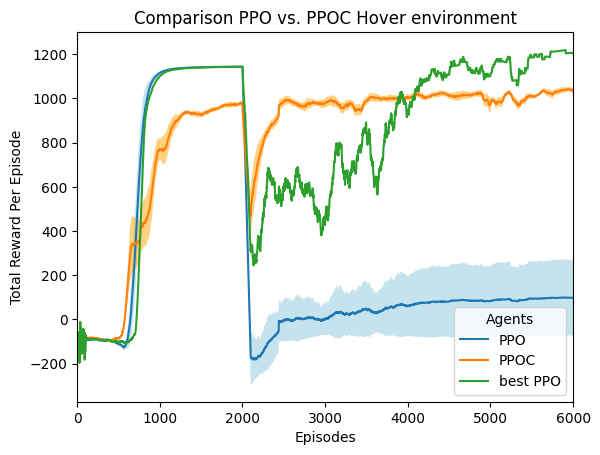

In [141]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(monitor.index, mean_ppo, label="PPO")
plt.fill_between(monitor.index, ci_lower_ppo, ci_upper_ppo, alpha=0.7, facecolor="Lightblue")
plt.plot(logs.index, mean_ppoc, label="PPOC")
plt.plot(monitor.index, monitor["Episodic Reward_1"], label="best PPO")
plt.fill_between(logs.index, ci_lower_ppoc, ci_upper_ppoc, alpha=0.5, facecolor="Orange")
plt.legend(title="Agents")
plt.legend(title="Agents")
plt.xlabel('Episodes')
plt.ylabel('Total Reward Per Episode')
plt.xlim(0,6000)
plt.title("Comparison PPO vs. PPOC Hover environment")
plt.show()

## Hover change goal

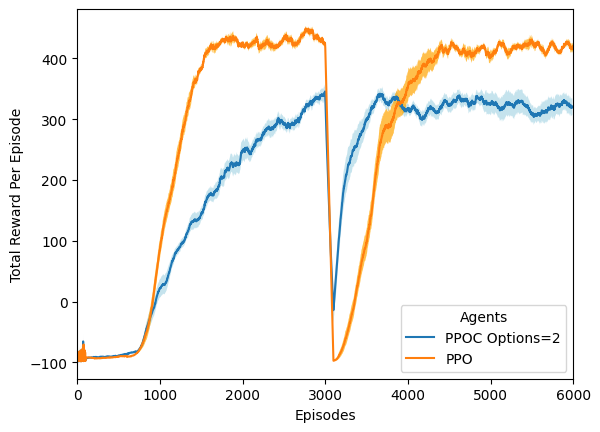

In [24]:
files = [
    # file paths
]

mean_ppoc2, ci_lower_ppoc2, ci_upper_ppoc2, logs = get_performance(files, "../data/transferlearning/", verbose=True)
files = [
    # file paths

]

mean_ppo, ci_lower_ppo, ci_upper_ppo = get_performance_ppo(files)
import numpy as np
import matplotlib.pyplot as plt
plt.plot(mean_ppoc2.index, mean_ppoc2, label="PPOC Options=2")
plt.fill_between(ci_lower_ppoc2.index, ci_lower_ppoc2, ci_upper_ppoc2, alpha=0.7, facecolor="Lightblue")
plt.plot(mean_ppo.index, mean_ppo, label="PPO")
plt.fill_between(ci_lower_ppo.index, ci_lower_ppo, ci_upper_ppo, alpha=0.7, facecolor="Orange")

plt.legend(title="Agents")
plt.xlabel('Episodes')
plt.ylabel('Total Reward Per Episode')
plt.xlim(0,6000)
plt.show()

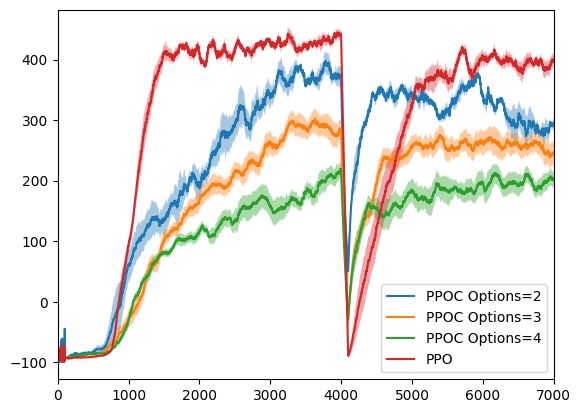

In [25]:
files2 = [
    # file paths
] # 2

files3 = [
    # file paths
]

files4 = [
    # file paths
]
files = [files2, files3, files4]
for i in range(len(files)):
    mean_ppoc, ci_lower_ppoc, ci_upper_ppoc = get_performance(files[i], "../data/transferlearning/")
    plt.plot(mean_ppoc.index, mean_ppoc, label=f"PPOC Options={i+2}")
    plt.fill_between(ci_lower_ppoc.index, ci_lower_ppoc, ci_upper_ppoc, alpha=0.4)

files = [
    # file paths
]

mean_ppo, ci_lower_ppo, ci_upper_ppo = get_performance_ppo(files)
plt.plot(mean_ppo.index, mean_ppo, label=f"PPO")
plt.fill_between(ci_lower_ppo.index, ci_lower_ppo, ci_upper_ppo, alpha=0.4)
plt.xlim(0,7000)
plt.legend()
plt.show()